In [2]:
!unzip /content/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/85/37361.bmp      
  inflating: train/85/3742.bmp       
  inflating: train/85/37518.bmp      
  inflating: train/85/37675.bmp      
  inflating: train/85/37989.bmp      
  inflating: train/85/38146.bmp      
  inflating: train/85/38303.bmp      
  inflating: train/85/38460.bmp      
  inflating: train/85/38617.bmp      
  inflating: train/85/38774.bmp      
  inflating: train/85/3881.bmp       
  inflating: train/85/38931.bmp      
  inflating: train/85/39088.bmp      
  inflating: train/85/39245.bmp      
  inflating: train/85/39402.bmp      
  inflating: train/85/39559.bmp      
  inflating: train/85/39716.bmp      
  inflating: train/85/39873.bmp      
  inflating: train/85/40030.bmp      
  inflating: train/85/40187.bmp      
  inflating: train/85/40344.bmp      
  inflating: train/85/40501.bmp      
  inflating: train/85/40658.bmp      
  inflating: train/85/40815.bmp      
  inflating: train/85/40972.bmp      

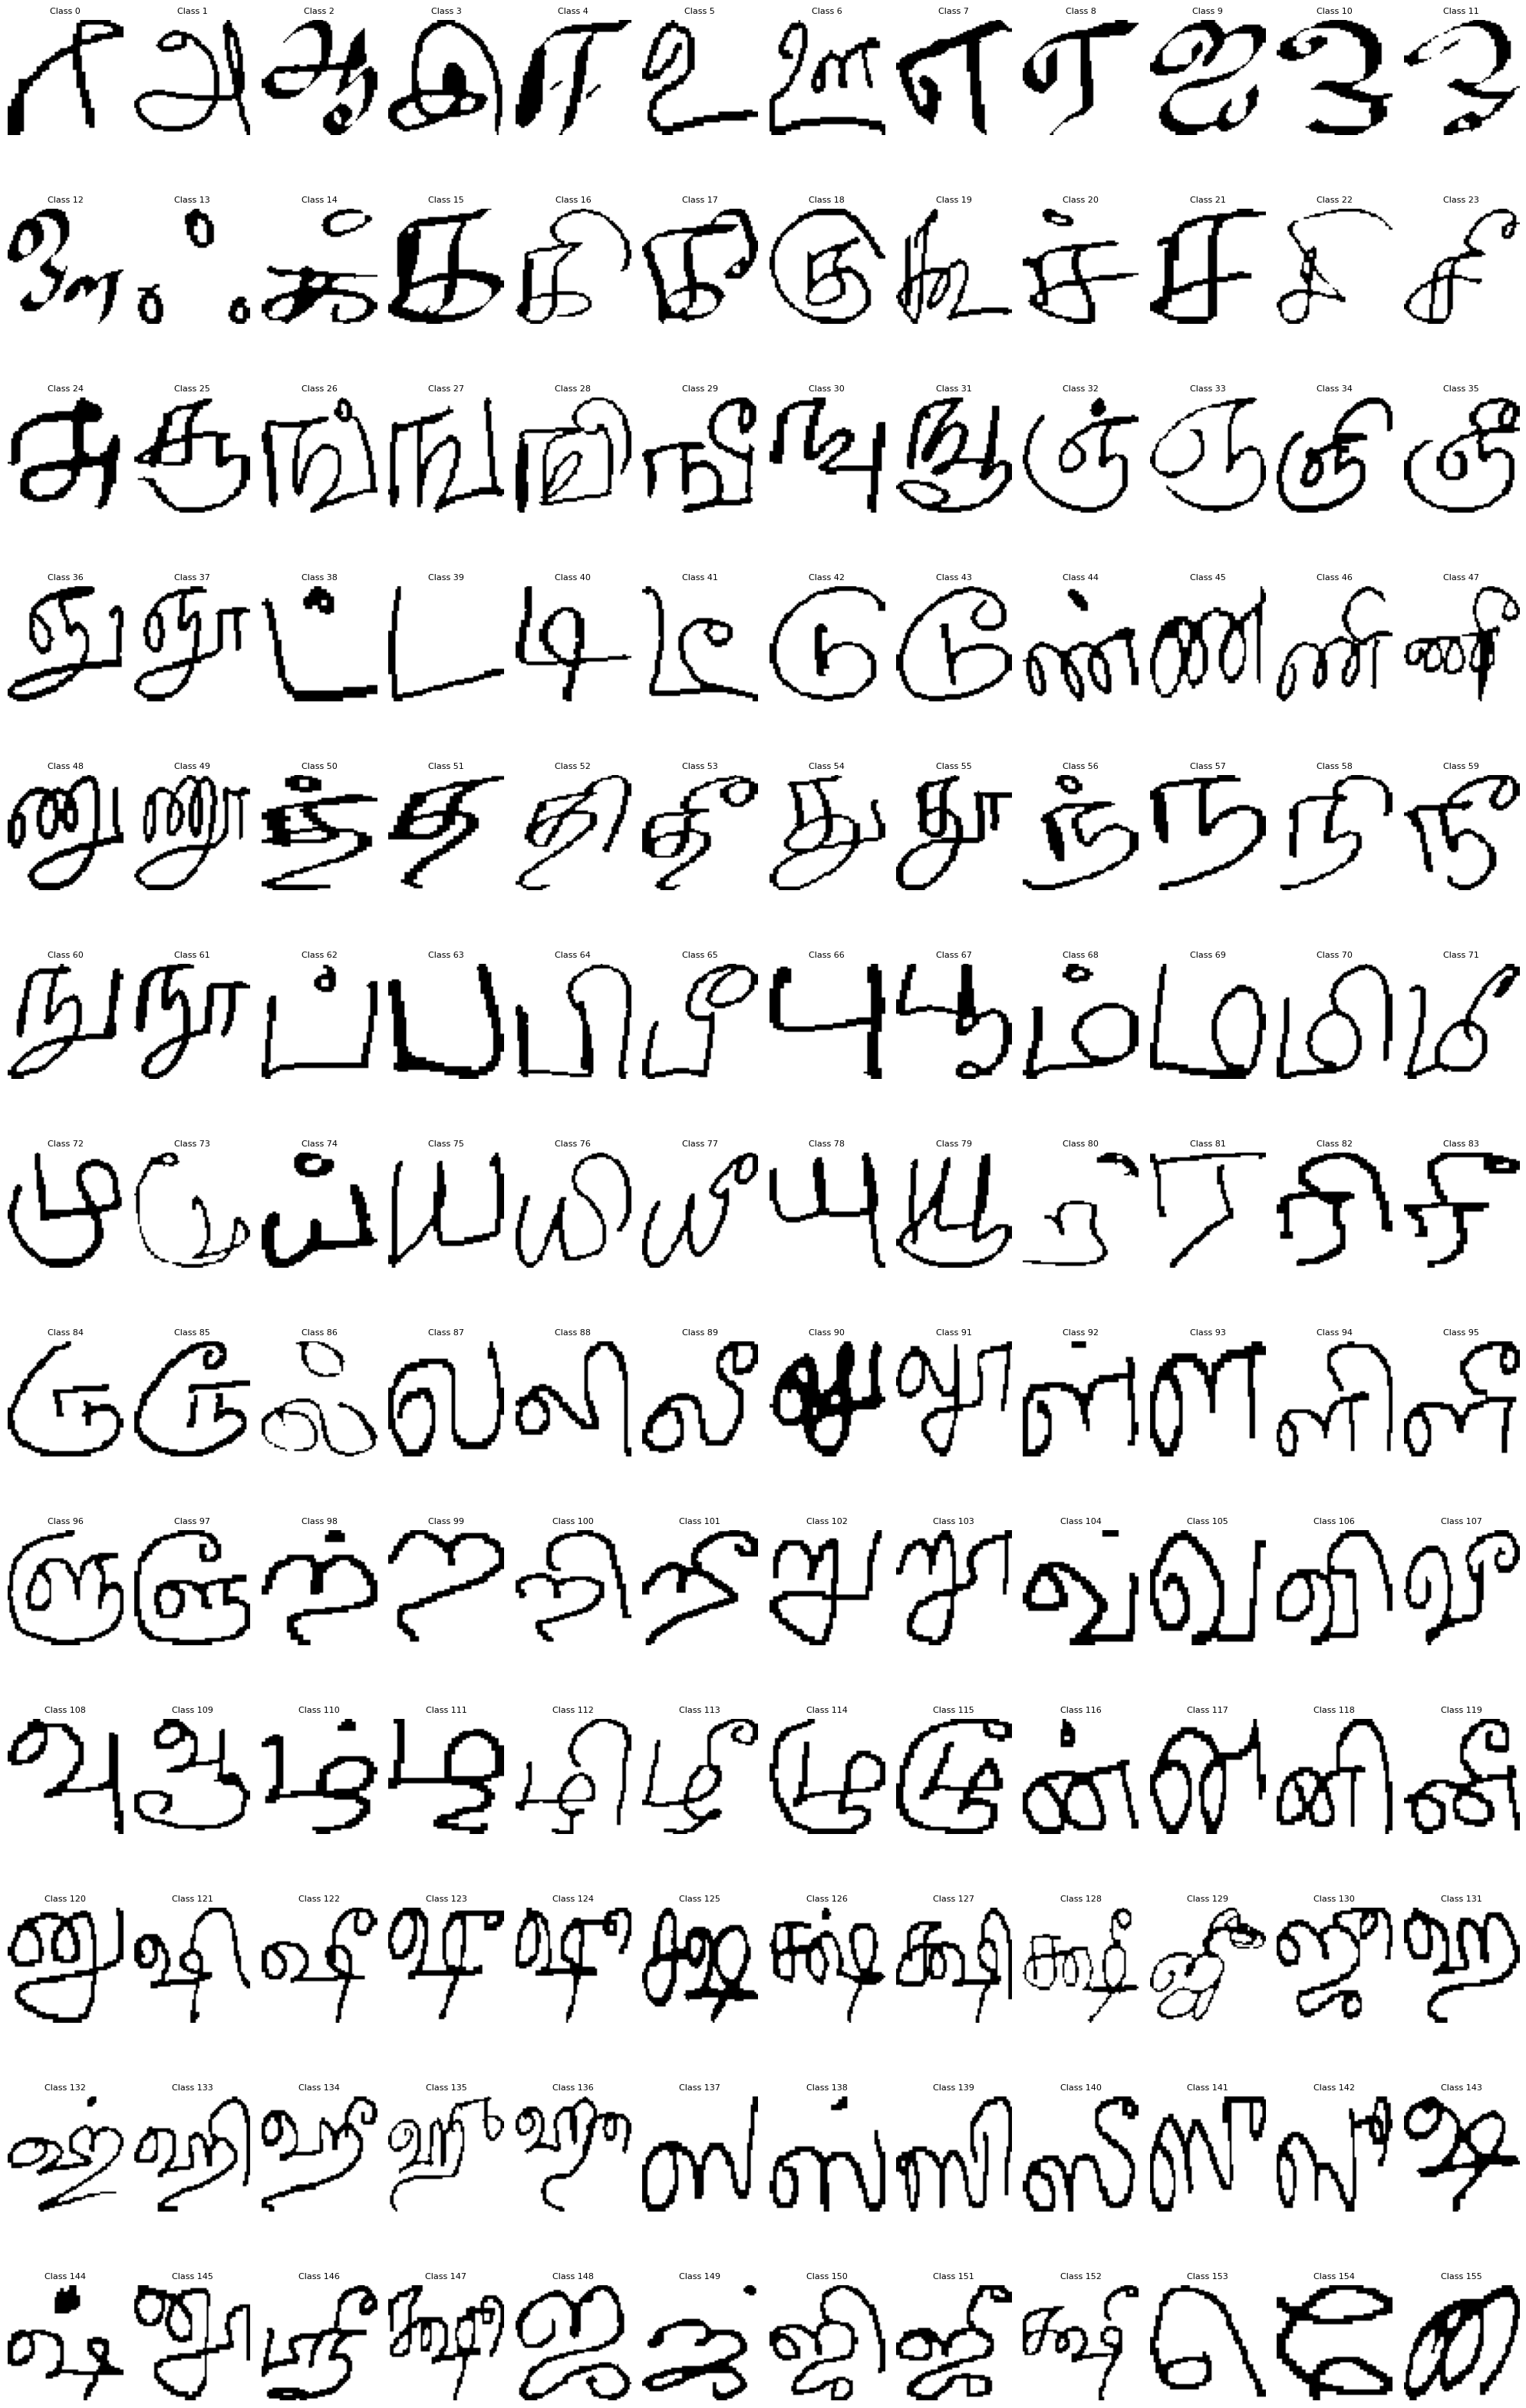

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to your dataset (change if needed)
train_dir = "train"

# Get all folder names (classes)
class_folders = sorted(os.listdir(train_dir), key=lambda x: int(x))

# Total classes
num_classes = len(class_folders)

# Plot grid size
cols = 12
rows = (num_classes + cols - 1) // cols  # ceiling division

plt.figure(figsize=(20, rows * 2.5))

for idx, class_name in enumerate(class_folders):
    class_path = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_path)

    if not image_files:
        continue  # skip if folder is empty

    # Load first image
    img_path = os.path.join(class_path, image_files[0])
    img = Image.open(img_path)

    # Plot
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Class {class_name}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [15]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paths & Settings
train_dir = "train"
image_size = (64, 64)
batch_size = 32
num_classes = 156

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

# ✅ Improved CNN Model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1), padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

# Train
model.fit(train_generator, validation_data=val_generator, epochs=30, callbacks=callbacks)

# Save
model.save("tamil_model_classonly_v2.h5")


Found 40286 images belonging to 156 classes.
Found 10010 images belonging to 156 classes.
Epoch 1/30
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.1293 - loss: 4.3871 - val_accuracy: 0.1196 - val_loss: 6.3256 - learning_rate: 0.0010
Epoch 2/30
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 46s 36ms/step - accuracy: 0.4157 - loss: 2.2293 - val_accuracy: 0.6083 - val_loss: 1.4956 - learning_rate: 0.0010
Epoch 3/30
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.5502 - loss: 1.6228 - val_accuracy: 0.7282 - val_loss: 0.9449 - learning_rate: 0.0010
Epoch 4/30
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.6412 - loss: 1.2716 - val_accuracy: 0.7240 - val_loss: 0.9652 - learning_rate: 0.0010
Epoch 5/30
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 46s 36ms/step - accuracy: 0.7101 - loss: 0.9996 - val_accuracy: 0.8200 - val_loss: 0.6013 - learning_rate: 0.0010
Epoch 6/30
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.7642 - loss: 0.8021 - val_accuracy: 0.8472 - val_loss: 0.515

In [16]:
# Create a cleaned and structured list of Tamil characters from the raw text

raw_text = """
ா,அ	ஆ	இ	ஈ	உ	ஊ	எ	ஏ	ஐ	ஒ	ஓ	ஔ ஃ க்		க	கி	கீ	கு	கூ ச்	ச	சி	சீ	சு	சூ ங்	ங	ஙி	ஙீ	ஙு	ஙூ ஞ்		ஞ		ஞி	ஞீ	ஞு	ஞூ ட்		ட		டி	டீ	டு	டூ ண்		ண		ணி	ணீ	ணு	ணூ த்	த		தி	தீ	து	தூ ந்		ந		நி	நீ	நு	நூ ப்		ப		பி	பீ	பு	பூ ம்		ம		மி	மீ	மு	மூ	ய்	ய		யி	யீ	யு	யூ ர்		ர		ரி	ரீ	ரு	ரூ ல்		ல		லி	லீ	லு	லூ	ள்		ள		ளி	ளீ	ளு	ளூ ற்		ற		றி	றீ	று	றூ வ்		வ		வி	வீ	வு	வூ ழ்		ழ		ழி	ழீ	ழு	ழூ ன்		ன		னி	னீ	னு	ஷி	ஷீ	ஷு	ஷூ க்ஷ	க்ஷ்	க்ஷி	க்ஷீ ஜி	ஜீ	ஹ	ஹ்		ஹி	ஹீ	ஹு	ஹூ		ஸ	ஸ்	ஸி	ஸீ	ஸு	ஸூ ஷ ஷ் னூ ஸ்ரீ shu ஜ	ஜ்	ji jii srii  	ெ  ே  ை
"""

# Step 1: Replace tabs and multiple spaces with single comma
import re

# Replace tabs and multiple spaces with comma
cleaned = re.sub(r"[\t\s]+", ",", raw_text.strip())

# Split into list
char_list = [c for c in cleaned.split(",") if c != ""]
char_list = list(dict.fromkeys(char_list))  # Remove duplicates while preserving order

# Create class mapping
tamil_class_map = {i: char for i, char in enumerate(char_list)}

tamil_class_map.items()  # Display key mappings (not printing here due to space)


dict_items([(0, 'ா'), (1, 'அ'), (2, 'ஆ'), (3, 'இ'), (4, 'ஈ'), (5, 'உ'), (6, 'ஊ'), (7, 'எ'), (8, 'ஏ'), (9, 'ஐ'), (10, 'ஒ'), (11, 'ஓ'), (12, 'ஔ'), (13, 'ஃ'), (14, 'க்'), (15, 'க'), (16, 'கி'), (17, 'கீ'), (18, 'கு'), (19, 'கூ'), (20, 'ச்'), (21, 'ச'), (22, 'சி'), (23, 'சீ'), (24, 'சு'), (25, 'சூ'), (26, 'ங்'), (27, 'ங'), (28, 'ஙி'), (29, 'ஙீ'), (30, 'ஙு'), (31, 'ஙூ'), (32, 'ஞ்'), (33, 'ஞ'), (34, 'ஞி'), (35, 'ஞீ'), (36, 'ஞு'), (37, 'ஞூ'), (38, 'ட்'), (39, 'ட'), (40, 'டி'), (41, 'டீ'), (42, 'டு'), (43, 'டூ'), (44, 'ண்'), (45, 'ண'), (46, 'ணி'), (47, 'ணீ'), (48, 'ணு'), (49, 'ணூ'), (50, 'த்'), (51, 'த'), (52, 'தி'), (53, 'தீ'), (54, 'து'), (55, 'தூ'), (56, 'ந்'), (57, 'ந'), (58, 'நி'), (59, 'நீ'), (60, 'நு'), (61, 'நூ'), (62, 'ப்'), (63, 'ப'), (64, 'பி'), (65, 'பீ'), (66, 'பு'), (67, 'பூ'), (68, 'ம்'), (69, 'ம'), (70, 'மி'), (71, 'மீ'), (72, 'மு'), (73, 'மூ'), (74, 'ய்'), (75, 'ய'), (76, 'யி'), (77, 'யீ'), (78, 'யு'), (79, 'யூ'), (80, 'ர்'), (81, 'ர'), (82, 'ரி'), (83, 'ரீ'), (84, 'ரு'), (85,

In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load model
model = load_model("/content/tamil_model_classonly_v2.h5")
image_size = (64, 64)



def predict_class_tamil(img_path):
    img = image.load_img(img_path, target_size=image_size, color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_number = np.argmax(prediction)

    tamil_character = tamil_class_map.get(class_number, "Unknown")

    print(f"Predicted Class Number: {class_number}")
    print(f"Tamil Character: {tamil_character}")
    return tamil_character

# Example usage
predict_class_tamil("/content/train/14/1009.bmp")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
Predicted Class Number: 46
Tamil Character: ணி


'ணி'

In [21]:
model = tf.keras.models.load_model("your_model.h5", compile=False)
